Task 1: Data Loading and Initial Exploration

In [5]:
import pandas as pd

df = pd.read_csv('titanic3.csv')

df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


- Performing EDA 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   float64
 9   cabin      1309 non-null   object 
 10  embarked   1307 non-null   object 
 11  boat       1309 non-null   object 
 12  body       1309 non-null   float64
 13  home.dest  1309 non-null   object 
dtypes: float64(7), object(7)
memory usage: 143.3+ KB


- Descriptive Statistics

In [6]:
descriptive_stats = df.describe()
print("Descriptive Statistics:")
print(descriptive_stats)


Descriptive Statistics:
            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    12.883199     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    22.000000     0.000000     0.000000   
50%       3.000000     0.000000    29.881135     0.000000     0.000000   
75%       3.000000     1.000000    35.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare         body  
count  1309.000000  1309.000000  
mean     33.295479    13.957219  
std      51.738879    55.442283  
min       0.000000    -1.000000  
25%       7.895800    -1.000000  
50%      14.454200    -1.000000  
75%      31.275000    -1.000000  
max     512.329200   328.000000  


- Shape

In [6]:
print(f"Dataset Shape: {df.shape[0]} rows and {df.shape[1]} columns\n")


Dataset Shape: 1310 rows and 14 columns



- Data types, numerical/categorical

In [7]:
print("Data Types:")
print(df.dtypes)
print("\n")

Data Types:
pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object




In [4]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


- Visualizing (to get a better understanding of the statistical data)

In [18]:
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Since the data is not normally distributed, I will use the boxplot to understand the outliers. I determined that it is not normally distributed because the data the median is not the same as the mean (not symmetric).

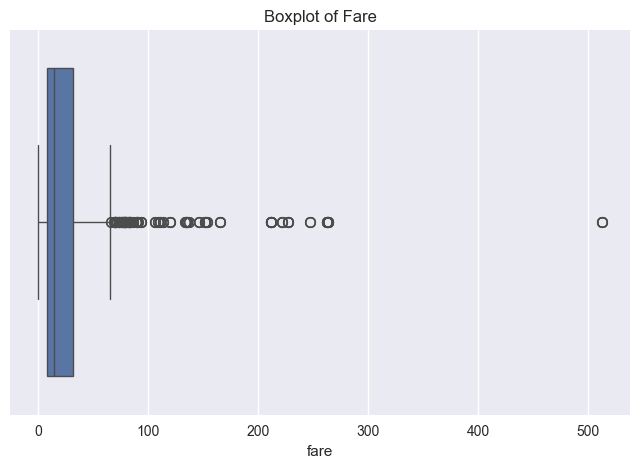

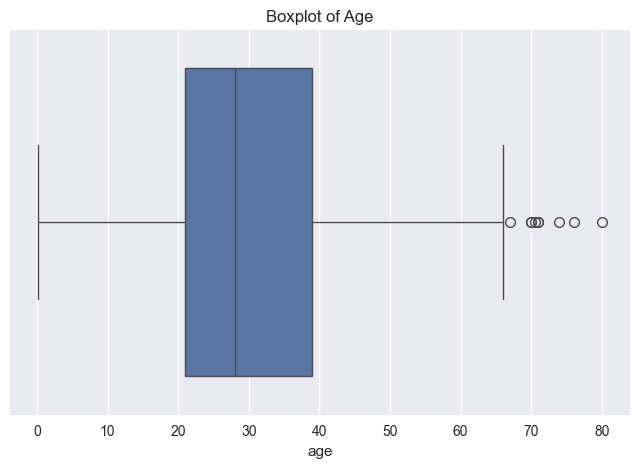

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')  

df = pd.read_csv('titanic3.csv') 

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["fare"])
plt.title("Boxplot of Fare")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["age"])
plt.title("Boxplot of Age")
plt.show()

According to the outputs of the boxplot:
Fare: The boxplot is right skewed, and this tells us that there are some outliers in the data.
Age: The boxplot is left skewed, and this tells us that there are some outliers in the data.

TASK 2: Managing Missing Values

In [20]:
missing_values = df.isnull().sum() 

missing_values = missing_values[missing_values > 0] 

print(missing_values)


pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64


1. Replace with mean, age is continuous, and fare only has a few missing values

In [12]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['fare'].fillna(df['fare'].mean(), inplace=True)

C:\Users\halay\AppData\Local\Temp\ipykernel_21328\883390424.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
C:\Users\halay\AppData\Local\Temp\ipykernel_21328\883390424.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

2. Replacing with -1, or unknown to avoid assumpptions, or fill in missign patters (for home for ex.)

In [13]:
df['sex'].fillna("Unknown", inplace=True)
df['cabin'].fillna("Unknown", inplace=True)
df['boat'].fillna(-1, inplace=True)
df['body'].fillna(-1, inplace=True)
df['home.dest'].fillna("Unknown", inplace=True)

C:\Users\halay\AppData\Local\Temp\ipykernel_21328\1475066345.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna("Unknown", inplace=True)
C:\Users\halay\AppData\Local\Temp\ipykernel_21328\1475066345.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

3. Replacing with most frequent value since it only has a few missing values and is categorical

In [ ]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

4. Removing rows with very few missing values (as it will have no major difference)

In [14]:
df.dropna(subset=['pclass', 'survived', 'name', 'sibsp', 'parch', 'ticket'], inplace=True)

- The dataset without missing values

In [15]:
df.to_csv("titanic_new.csv", index=False)


In [1]:
import pandas as pd
df = pd.read_csv('titanic_new.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,-1.0,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,-1.0,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,-1,-1.0,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,-1,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,-1,-1.0,"Montreal, PQ / Chesterville, ON"


TASK 3: Encoding Categorical Variables

In [17]:
import sys
print(sys.executable)

c:\Users\halay\OneDrive\Documents\Database\venv\Scripts\python.exe


In [1]:
from sklearn.preprocessing import OneHotEncoder

- Identifying the categorical variables

In [6]:
categorical_vars = df.select_dtypes(include=['object']).columns
print("Categorical variables:", categorical_vars)

Categorical variables: Index(['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest'], dtype='object')


In [24]:
# ------ TEST -------
print("Number of unique values in each categorical variable:")

for column in ['sex', 'embarked', 'cabin', 'ticket', 'boat', 'home.dest', 'name']:
    n_unique = df[column].fillna('Missing').nunique()
    print(f"\n{column}: {n_unique} unique values")
    
    # Show value counts for variables with fewer categories
    if n_unique < 10:  # Only show distribution for variables with less than 10 categories
        print("\nValue distribution:")
        print(df[column].value_counts(dropna=False))  # Include NaN values in the count
    else:
        print(f"Sample of values (first 5):")
        print(df[column].value_counts(dropna=False).head())


Number of unique values in each categorical variable:

sex: 3 unique values

Value distribution:
sex
male      843
female    466
NaN         1
Name: count, dtype: int64

embarked: 4 unique values

Value distribution:
embarked
S      914
C      270
Q      123
NaN      3
Name: count, dtype: int64

cabin: 187 unique values
Sample of values (first 5):
cabin
NaN                1015
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
D                     4
Name: count, dtype: int64

ticket: 930 unique values
Sample of values (first 5):
ticket
CA. 2343    11
CA 2144      8
1601         8
PC 17608     7
347082       7
Name: count, dtype: int64

boat: 28 unique values
Sample of values (first 5):
boat
NaN    824
13      39
C       38
15      37
14      33
Name: count, dtype: int64

home.dest: 370 unique values
Sample of values (first 5):
home.dest
NaN                     565
New York, NY             64
London                   14
Montreal, PQ             10
Cornwall / Akron,

In [28]:
print("Number of unique values in each categorical variable:")

for column in ['sex', 'embarked', 'cabin', 'ticket', 'boat', 'home.dest', 'name']:
    n_unique = df[column].nunique()
    print(f"{column}: {n_unique} unique values")
    
    if n_unique < 10:  
        print("\nValue distribution:")
        print(df[column].value_counts())
    else:
        print(f"\nToo many values to display ({n_unique} unique values)")

Number of unique values in each categorical variable:
sex: 2 unique values

Value distribution:
sex
male      843
female    466
Name: count, dtype: int64
embarked: 3 unique values

Value distribution:
embarked
S    914
C    270
Q    123
Name: count, dtype: int64
cabin: 186 unique values

Too many values to display (186 unique values)
ticket: 929 unique values

Too many values to display (929 unique values)
boat: 27 unique values

Too many values to display (27 unique values)
home.dest: 369 unique values

Too many values to display (369 unique values)
name: 1307 unique values

Too many values to display (1307 unique values)


In [30]:
# separate code for home.dest because output above was too long
print("Value distribution of home.dest\n")

total_rows = len(df)
missing_values = df['home.dest'].isna().sum()
unique_values = df['home.dest'].nunique()

print(f"Total number of rows: {total_rows}")
print(f"Number of missing values: {missing_values}")
print(f"Number of unique destinations: {unique_values}")
print(f"Percentage of missing values: {(missing_values/total_rows)*100:.2f}%\n")

Value distribution of home.dest

Total number of rows: 1310
Number of missing values: 565
Number of unique destinations: 369
Percentage of missing values: 43.13%



I decided to drop the features, name, ticket, and home.dest, as they have too many values and encoding them would result in high dimensionality which could affect the model negatively and it would be hard to interpret results, and I think that they dont have an impact on predicting the survival of the passesngers.

- Encoding

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# as each value in the feature column 'cabin' starts with a letter (which I assumed is the deck), I decided to extract the deck and use that for encoding
df['deck'] = df['cabin'].str[0]

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

columns_to_encode = ['sex', 'deck', 'embarked']

X = df[columns_to_encode]

encoded_data = encoder.fit_transform(X)

feature_names = encoder.get_feature_names_out(columns_to_encode)

encoded_df = pd.DataFrame(
    encoded_data,
    columns=feature_names,
    index=df.index
)

numerical_features = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'survived']
final_df = pd.concat([df[numerical_features], encoded_df], axis=1)

print("Original shape:", df.shape)
print("Encoded shape:", final_df.shape)

print("\nEncoded features:")
for column in encoded_df.columns:
    print(column)

print(encoded_df.head())

final_df.to_csv('titanic_encoded.csv', index=False)

# REVIEW! (whether necessary to keep or no)
print("\nEncoding Summary:")
print("Categories for each feature:")
for i, feature in enumerate(columns_to_encode):
    print(f"\n{feature}:")
    print(encoder.categories_[i])

Original shape: (1310, 16)
Encoded shape: (1310, 22)

Encoded features:
sex_female
sex_male
sex_nan
deck_A
deck_B
deck_C
deck_D
deck_E
deck_F
deck_G
deck_T
deck_nan
embarked_C
embarked_Q
embarked_S
embarked_nan
   sex_female  sex_male  sex_nan  deck_A  deck_B  deck_C  deck_D  deck_E  \
0         1.0       0.0      0.0     0.0     1.0     0.0     0.0     0.0   
1         0.0       1.0      0.0     0.0     0.0     1.0     0.0     0.0   
2         1.0       0.0      0.0     0.0     0.0     1.0     0.0     0.0   
3         0.0       1.0      0.0     0.0     0.0     1.0     0.0     0.0   
4         1.0       0.0      0.0     0.0     0.0     1.0     0.0     0.0   

   deck_F  deck_G  deck_T  deck_nan  embarked_C  embarked_Q  embarked_S  \
0     0.0     0.0     0.0       0.0         0.0         0.0         1.0   
1     0.0     0.0     0.0       0.0         0.0         0.0         1.0   
2     0.0     0.0     0.0       0.0         0.0         0.0         1.0   
3     0.0     0.0     0.0       

TASK 4

In [36]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load your encoded data
df = pd.read_csv('titanic_encoded.csv')

# All numerical features
numerical_features = ['age', 'fare', 'pclass', 'sibsp', 'parch']

# Create copy for scaling
df_scaled = df.copy()

# Apply MinMaxScaler to all numerical features
# This preserves non-negativity and relative distances
scaler = MinMaxScaler()
df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])

# Save the scaled dataset
df_scaled.to_csv('titanic_scaled.csv', index=False)

# Print comparison of original and scaled data
print("Original vs Scaled Data:\n")
print("Original data statistics:")
print(df[numerical_features].describe())
print("\nScaled data statistics:")
print(df_scaled[numerical_features].describe())



Original vs Scaled Data:

Original data statistics:
               age         fare       pclass        sibsp        parch
count  1046.000000  1308.000000  1309.000000  1309.000000  1309.000000
mean     29.881135    33.295479     2.294882     0.498854     0.385027
std      14.413500    51.758668     0.837836     1.041658     0.865560
min       0.166700     0.000000     1.000000     0.000000     0.000000
25%      21.000000     7.895800     2.000000     0.000000     0.000000
50%      28.000000    14.454200     3.000000     0.000000     0.000000
75%      39.000000    31.275000     3.000000     1.000000     0.000000
max      80.000000   512.329200     3.000000     8.000000     9.000000

Scaled data statistics:
               age         fare       pclass        sibsp        parch
count  1046.000000  1308.000000  1309.000000  1309.000000  1309.000000
mean      0.372206     0.064988     0.647441     0.062357     0.042781
std       0.180545     0.101026     0.418918     0.130207     0.096173


NORMALIZE DISCRETE ___ STANDARDIZE CONTINUOUS

Difference between Standardization and Normalization and their importance

Normalization: is converting an actual numerical range of values into a predefined and artificial range of values (usually in the interval [0,1] or [-1,1]). Since Normalization uses a rnage it compresses feature values (including outliers) in the range, so if the outliers are too different from the rest of the data this can affect the new normalized data.
I decide to normalize the continuous features: 'age', and 'fare'. 

Standardization: is a procedure to center the data to have a mean of 0 and it scales it to have a standard deviation of 1, this results in the feature values having properties of a standatrd normal distribution.
I decided to stardaize the discrete features: 'pclass', 'sibsp', and 'parch'

Normalization tends to work better for uniformly distributed data. Whereas, Standardization tends to work bets for normally distributed data. 

We use feature scaling to increase the training speed of models and to ensure that features are not dominating others especially in gradient descent as large feature slow down training and this results in a better ML model with better, faster, and more accurate output.

TASK 5